<a href="https://colab.research.google.com/github/camilotorron/TestNotebooks/blob/main/WineQualityRegressor_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
data = pd.read_csv('/content/sample_data/winequality-red.csv')
data.shape

(1599, 12)

In [81]:
df = data.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [83]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [84]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [85]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [86]:
df.drop(['residual sugar', 'free sulfur dioxide', 'pH', 'chlorides'] , axis = 1, inplace = True)
df.head()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,34.0,0.9978,0.56,9.4,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


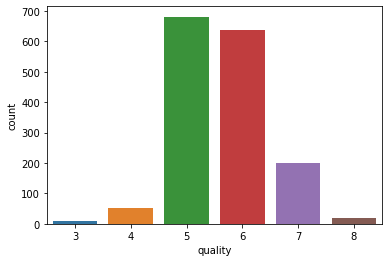

In [87]:
import seaborn as sns

sns.countplot(df['quality'])

In [88]:
X = df.drop(['quality'], axis = 1)
X

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,44.0,0.99547,0.71,10.2


In [89]:
y = df['quality']

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=123)
((X_train.shape, y_train.shape),(X_test.shape, y_test.shape))

(((1199, 7), (1199,)), ((400, 7), (400,)))

In [95]:
import xgboost as xgb

reg = xgb.XGBRegressor(objective='reg:squarederror')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [96]:
score = reg.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.6039836228662874


In [98]:
pd.DataFrame(y_pred)

,0
0,6.242547
1,5.006512
2,5.016073
3,6.217690
4,5.586565
...,...
395,6.099886
396,5.523130
397,5.728549
398,5.902915


In [108]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.41
RMSE: 0.64


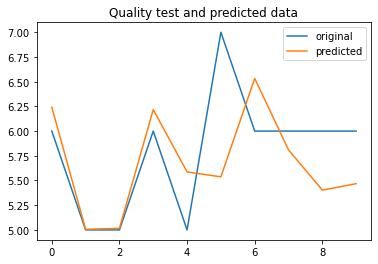

In [109]:
#x_ax = range(len(y_test))
x_ax = range(0,10)
plt.plot(x_ax, y_test[:10], label="original")
plt.plot(x_ax, y_pred[:10], label="predicted")
plt.title("Quality test and predicted data")
plt.legend()
plt.show()